### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
candy = pd.read_csv('candy.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
#checking the total number of rows and columns in data
candy.shape

(85, 13)

In [4]:
#a simple way to check for missing values
#if the count for each column is same as number of rows i.e., 85, we do not have missing values
candy.count()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

### Plots

- Visualizing some aspects of data to further understand it.
- First we start with scatter plots for price percentile and sugar percentile as these are the only two non-binary numerical columns. We plot it against Win percentage to see if there is any relationship between them.

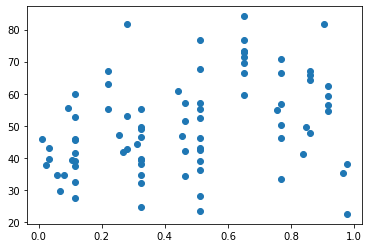

In [5]:
plt.scatter(candy['pricepercent'].to_numpy(), candy['winpercent'].to_numpy())
plt.show()

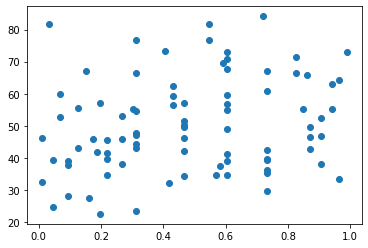

In [6]:
plt.scatter(candy['sugarpercent'].to_numpy(), candy['winpercent'].to_numpy())
plt.show()

- From the above scatter plots we can note that, both sugar content and price of the product do not affect win percentage in particular as the plot fails to show any relationship (linear, polynomial, etc) between them.
- Based on this, let's focus on columns with binary data

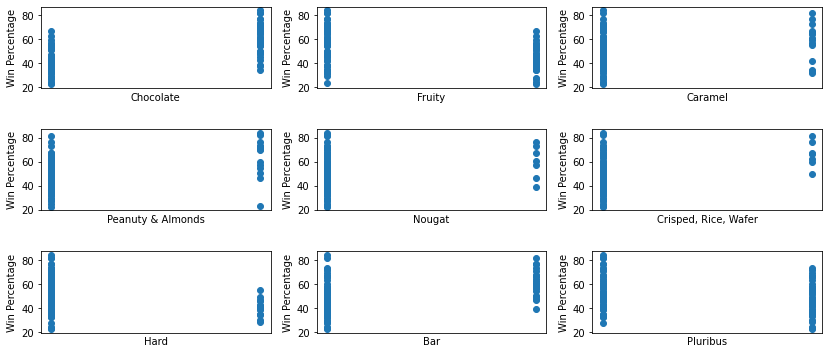

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(14, 6),subplot_kw=dict(xticks=[]))
fig.subplots_adjust(wspace=0.2, hspace=0.5)

ax[0,0].scatter(candy['chocolate'].to_numpy(), candy['winpercent'].to_numpy())
ax[0,0].set(xlabel="Chocolate", ylabel="Win Percentage")

ax[0,1].scatter(candy['fruity'].to_numpy(), candy['winpercent'].to_numpy())
ax[0,1].set(xlabel="Fruity", ylabel="Win Percentage")

ax[0,2].scatter(candy['caramel'].to_numpy(), candy['winpercent'].to_numpy())
ax[0,2].set(xlabel="Caramel", ylabel="Win Percentage")

ax[1,0].scatter(candy['peanutyalmondy'].to_numpy(), candy['winpercent'].to_numpy())
ax[1,0].set(xlabel="Peanuty & Almonds", ylabel="Win Percentage")

ax[1,1].scatter(candy['nougat'].to_numpy(), candy['winpercent'].to_numpy())
ax[1,1].set(xlabel="Nougat", ylabel="Win Percentage")

ax[1,2].scatter(candy['crispedricewafer'].to_numpy(), candy['winpercent'].to_numpy())
ax[1,2].set(xlabel="Crisped, Rice, Wafer", ylabel="Win Percentage")

ax[2,0].scatter(candy['hard'].to_numpy(), candy['winpercent'].to_numpy())
ax[2,0].set(xlabel="Hard", ylabel="Win Percentage")

ax[2,1].scatter(candy['bar'].to_numpy(), candy['winpercent'].to_numpy())
ax[2,1].set(xlabel="Bar", ylabel="Win Percentage")

ax[2,2].scatter(candy['pluribus'].to_numpy(), candy['winpercent'].to_numpy())
ax[2,2].set(xlabel="Pluribus", ylabel="Win Percentage");

- From the above we can see that win percentage is divided between both binary choices, so we will proceed further with these columns.
- Next, we visualize a count plot for the nine columns, to look at the count of distinct choices people made.

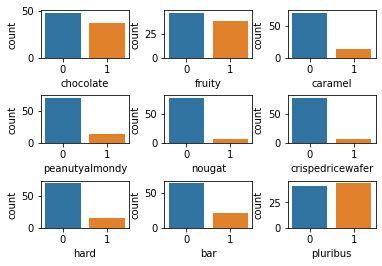

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.countplot(x="chocolate", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 2)
sns.countplot(x="fruity", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 3)
sns.countplot(x="caramel", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 4)
sns.countplot(x="peanutyalmondy", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 5)
sns.countplot(x="nougat", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 6)
sns.countplot(x="crispedricewafer", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 7)
sns.countplot(x="hard", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 8)
sns.countplot(x="bar", data=candy, ax=ax)
ax = fig.add_subplot(3, 3, 9)
sns.countplot(x="pluribus", data=candy, ax=ax)
plt.show()

- Purely from above graph, we can say that, more votes were in favor of candies with caramel, peanuts or almonds, noughat, crisped rice and softer to chew candies.
- However, it also shows that our dataset does favor certain choices more.
- As can be seen below, for choices like nougat and crisped rice, we have less than 10 choices.

In [9]:
print("Caramel: No: {} Yes: {}".format(candy['caramel'].value_counts()[0], candy['caramel'].value_counts()[1]))
print("\nPeanutyalmondy: No: {} Yes: {}".format(candy['peanutyalmondy'].value_counts()[0], candy['peanutyalmondy'].value_counts()[1]))
print("\nNougat: No: {} Yes: {}".format(candy['nougat'].value_counts()[0], candy['nougat'].value_counts()[1]))
print("\nCrispedricewafer: No: {} Yes: {}".format(candy['crispedricewafer'].value_counts()[0], candy['crispedricewafer'].value_counts()[1]))
print("\nHard: No: {} Yes: {}".format(candy['hard'].value_counts()[0], candy['hard'].value_counts()[1]))

Caramel: No: 71 Yes: 14

Peanutyalmondy: No: 71 Yes: 14

Nougat: No: 78 Yes: 7

Crispedricewafer: No: 78 Yes: 7

Hard: No: 70 Yes: 15


In [10]:
columns = candy.columns.tolist()
columns

['competitorname',
 'chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent',
 'winpercent']

### Hypothesis testing

R provides good packages for hypothesis testing and we will be using R code to do the same.

(Please refer the r-code file for code.)

Hypothesis test results are tabulated below:

| Column | p-value |
| --------- | --------- |
| chocolate | 4.164e-10 |
| fruity | 0.0001847 |
| caramel | 0.08728 |
| peanutyalmondy | 0.003198 |
| nougat | 0.09271 |
| crispedricewafer | 0.004119 |
| hard | 3.125e-05 |
| bar | 1.6e-05 |
| pluribus | 0.02324 |

- Based on p-values, columns with values <0.05 can be considered significantly contributing to win-percent.
- These columns include chocolate, fruity, peanutyalmondy, crispedricewafer, hard, bar and pluribus.
- However, we need to note that, for some of the columns we do not have enough data (the ones mentioned two cells above) distributed between the two choices to completely follow the table, so we would be considering all the 9 columns going forward.

### Defining X and Y for further understanding relationship between other columns and Win percentage

In [11]:
X = candy.drop(axis=1, columns=['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']) #'sugarpercent', 'pricepercent'
y = candy['winpercent']

### 1. Regression

- Using linear regression to get co-efficients for different columns.
- We also get a r-square value on its self prediction with linear regression.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(X, y)

In [14]:
print(reg.coef_)
print(reg.intercept_)

[19.90579455 10.26773158  3.38428178 10.14101727  2.41625176  8.99154904
 -4.8725601  -0.72196626 -0.15991743]
35.01545874153001


In [15]:
reg.score(X,y)

0.514809706138915

- The r-square value (~51%) is very low. That is these variables might not have a completely linear relationship with target variable.
- A candy that satisfies none of these conditions, still gets a baseline win percentage of 35% (intercept).
- 50% (r-square) of rest of the win percentage can be explained with other 9 variables.
- We can see that co-efficients for certain choices are higher. For example, adding chocolates, fruits, peanut and almonds and crisp rice wafers add roughly 20%, 10%, 10% and 10% to the overall win percentage. Whereas, hard, bar and pluribus would be better off with binary choice of zero i.e., candy being soft, not as a bar and not in a package with multiple other candies.

### 2. Clustering

#### 2.1 Determing number of clusters to use

- Another way of getting insights from data is to use the unsupervised technique of clustering.
- Here, we first plot curves based on Elbow method to determine number of clusters.
- Elbow curves are plotted with two methods:
    - distortion
    - intertia
- Based on these, we K-Means is used for clustering   


In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

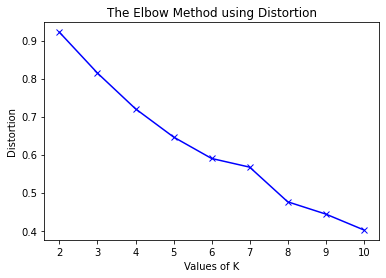

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

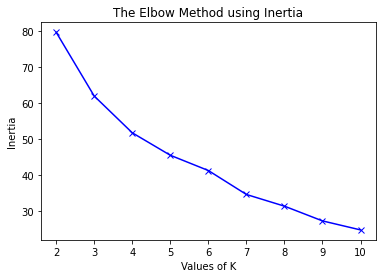

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### 2.2 Clustering using K-Means

Based on both above plots, we proceed with K=2 i.e., two clusters

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.cluster_centers_

array([[ 9.47368421e-01,  5.55111512e-17,  2.89473684e-01,
         3.42105263e-01,  1.84210526e-01,  1.84210526e-01,
        -2.77555756e-17,  5.52631579e-01,  3.15789474e-01],
       [ 2.12765957e-02,  8.08510638e-01,  6.38297872e-02,
         2.12765957e-02, -5.55111512e-17, -5.55111512e-17,
         3.19148936e-01,  2.77555756e-16,  6.80851064e-01]])

- The first cluster seems to emphasize more on chocolate, caramel, peanuts and almonds, nougat, crisped rice wafer and bar.
- The second cluster seems to emphasize more on fruity, hard and pluribus.

### 3. RandomForest

We can try to leverage RandomForest's feature importance to see if it has similar results as before.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
randomforest = RandomForestRegressor(random_state=0)

model_random = randomforest.fit(X, y)
list_features = model_random.feature_importances_

list_features

array([0.54522679, 0.04760873, 0.07058364, 0.11125912, 0.02053039,
       0.05000061, 0.02391246, 0.08417748, 0.04670076])

Here too, we can note that high importance is being given to presence of chocolate, followed by peanut and almonds

### Concluding Statements

- Your choice of candies could differ based on your personal taste.
- But the overall result of polls, though might not help us buy a single mass favorite brand of candy, it gives us an idea that people prefer candies with chocolate and the one's that include nuttiness or crispiness.
- It would be nice to have candies which are easy to chew and packed separately.
- Ocassionally, can include fruity flavors in the mix.